# Clustering

## <u>K-Means</u>

Demo Algoritma K-Means dengan Scikit-Learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Data Summary

In [2]:
df = pd.read_csv('../../Datasets/Mall_Customers.csv')
df.head() # Preview sebagian data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Summary secara statistika deskriptif pada atribut **Age**, **Annual Income (k$)**, dan **Spending Score (1-100)**:

In [3]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Tampilkan tipe data dari setiap atribut data:

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Deteksi apakah terdapat missing value di dalam dataset:

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Visualisasikan Distribusi Data

Visualisasi dengan **histogram**:

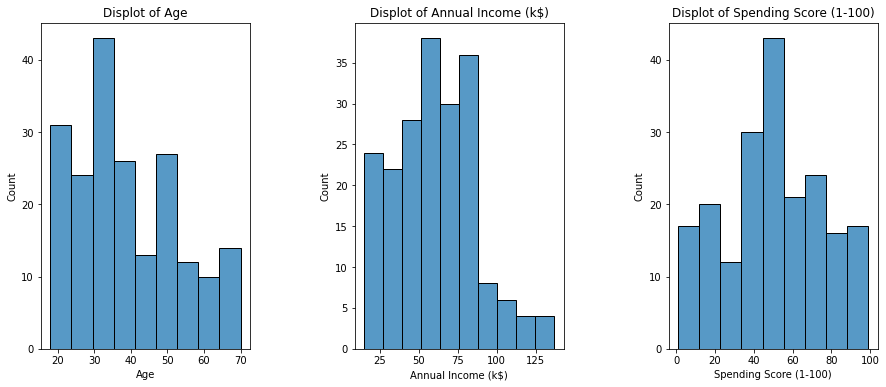

In [6]:
plt.figure(1, figsize=(15,6))
n = 0;
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x])
    plt.title('Displot of {}'.format(x))

Visualisasikan dengan **scatter plot** untuk mengetahui relasi antar atribut:

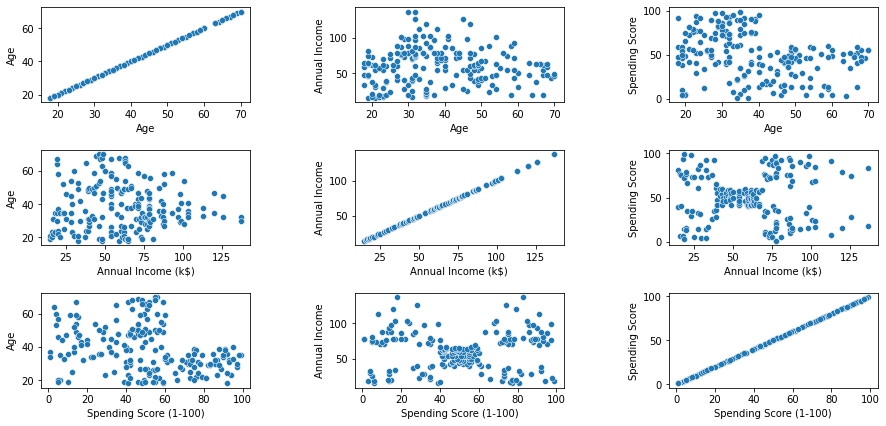

In [7]:
plt.figure(1, figsize=(15,7))
n = 0;
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.scatterplot(x=x, y=y, data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)

Berdasarkan scatter plot di atas terlihat bahwa terdapat pola terbentuk dari relasi antara atribut **Annual Income** dengan **Spending Score**. Sehingga kita akan perjelas visualisasi data berdasarkan dua atribut tersebut.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

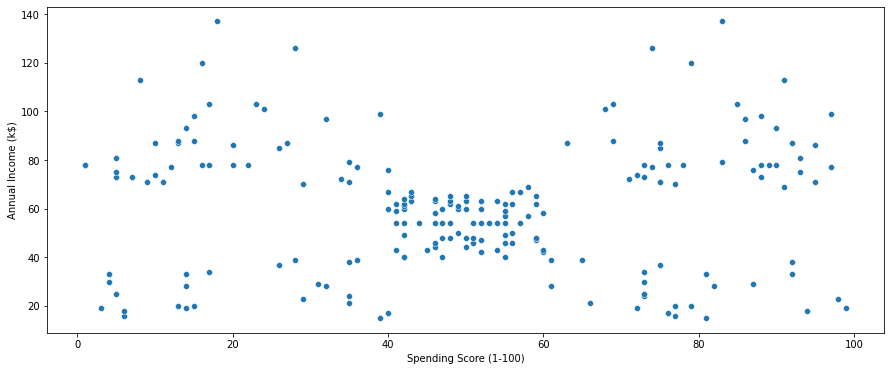

In [8]:
plt.figure(1, figsize=(15, 6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)

## Proses Clustering

Proses clustering dilakukan dengan menggunakan kelas `KMeans` pada modul `scikit.cluster`. Keterangan lebih lengkap mengenai kelas `K-Means` dapat langsung klik [dokumentasi resmi](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) dari Scikit-Learn langsung.

In [9]:
X = df[['Spending Score (1-100)', 'Annual Income (k$)']].values # Ambil value/nilai atribut Spending Score dan Annual Income
kmeans = KMeans(n_clusters=4, # Jumlah cluster K
                init='k-means++',  # Metode inisialisasi centroid
                random_state=111)

In [10]:
y_kmeans = kmeans.fit_predict(X) # Fit dan prediksi dataset
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Visualisasikan hasil clustering dengan nilai `K(centroid) = 4`.

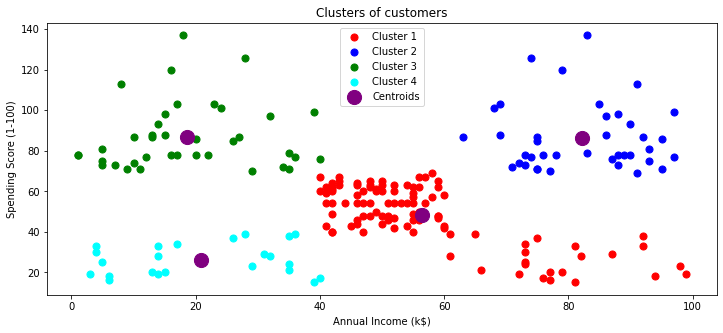

In [11]:
plt.figure(1, figsize=(12, 5))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=50, c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='purple', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Dari plot di atas terlihat bahwa terdapat kelompok data berwarna merah yang jaraknya terlalu jauh dari titik pusat (**`K`**). Di mana seharusnya menjadi kelompok data yang berbeda. Sehingga kita bisa lakukan kembali proses klastering dengan jumlah `K = 5`.

In [12]:
X = df[['Spending Score (1-100)', 'Annual Income (k$)']].values
kmeans = KMeans(n_clusters=5, # jumlah centroid menjadi 5
                init='k-means++',  
                random_state=111)
y_kmeans = kmeans.fit_predict(X)

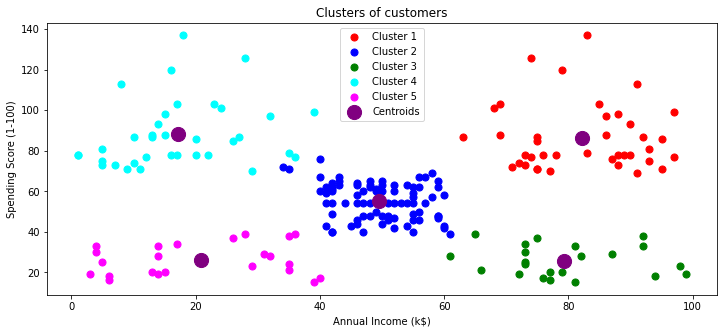

In [13]:
plt.figure(1, figsize=(12, 5))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=50, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='purple', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Sekarang terlihat terdapat cluster baru dari data yaitu data yang berwarna hijau. Namun yang menjadi pertanyaan adalah apakah jumlah cluster (**`K`**) tersebut adalah jumlah cluster yang paling optimal? Tanpa teknik khusus, sangat sulit untuk menentukan jumlah cluster yang optimal dari suatu data. Ada dua cara yang umumnya digunakan untuk menentukan jumlah cluster sebelum pengelompokkan data dengan K-Means dilakukan yaitu:
1. **Elbow Method**
2. **Silhouette Score**

### 1. Elbow Method

Analisis untuk menentukan jumlah klaster yang paling optimal

In [14]:
wcss = [] # Singkatan dari Within Clusters Sum of Squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',
                    random_state=111) 
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_) # nilai WCSS disimpan di dalam array wcss[]

n_cluster = 1
for i in (wcss):
    print('Nilai WCSS untuk setiap Jumlah Cluster {}: {}'.format(n_cluster, np.round(i, 2)))
    n_cluster += 1

Nilai WCSS untuk setiap Jumlah Cluster 1: 269981.28
Nilai WCSS untuk setiap Jumlah Cluster 2: 181363.6
Nilai WCSS untuk setiap Jumlah Cluster 3: 106348.37
Nilai WCSS untuk setiap Jumlah Cluster 4: 73679.79
Nilai WCSS untuk setiap Jumlah Cluster 5: 44448.46
Nilai WCSS untuk setiap Jumlah Cluster 6: 37233.81
Nilai WCSS untuk setiap Jumlah Cluster 7: 30227.61
Nilai WCSS untuk setiap Jumlah Cluster 8: 24986.53
Nilai WCSS untuk setiap Jumlah Cluster 9: 22860.97


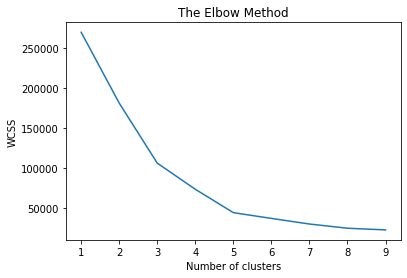

In [15]:
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Grafik di atas didapatkan dengan menghitung nilai cluster yang terbentuk dari nilai **`K`** tertentu. Berdasarkan kode program ini `for i in range(1, 20)` berarti kita menghitung nilai **Within Clusters Sum of Squares** (WCSS) dari nilai `K = 1` sampai dengan nilai `K = 20`.

Maka berdasarkan gambar di bawah, kita bisa lihat sudut terakhir yang terbentuk menunjukkan nilai `5` pada sumbu `X`-nya.
![elbow-method](img/elbow-method.jpg)

### 2. Silhouette Score

Untuk jumlah clusters = 2, Avg. Silhouette Score = 0.3
Untuk jumlah clusters = 3, Avg. Silhouette Score = 0.47
Untuk jumlah clusters = 4, Avg. Silhouette Score = 0.49
Untuk jumlah clusters = 5, Avg. Silhouette Score = 0.55
Untuk jumlah clusters = 6, Avg. Silhouette Score = 0.54
Untuk jumlah clusters = 7, Avg. Silhouette Score = 0.53


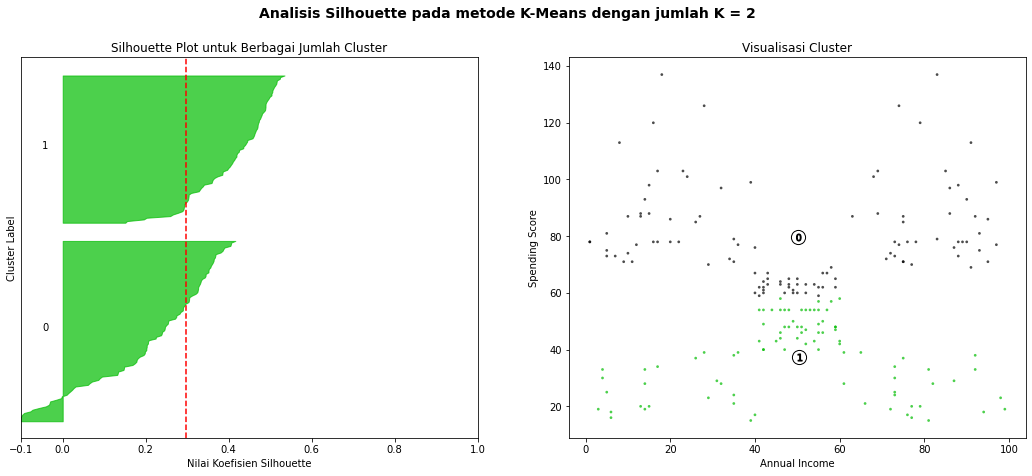

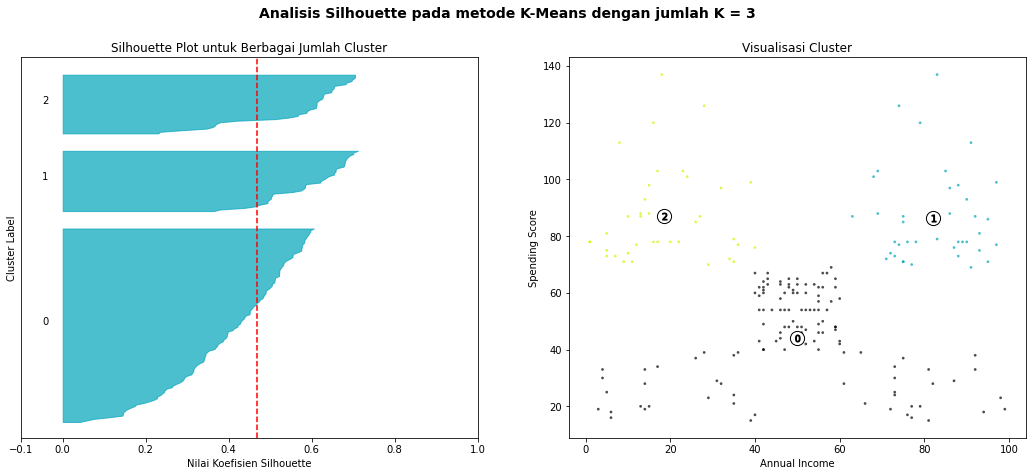

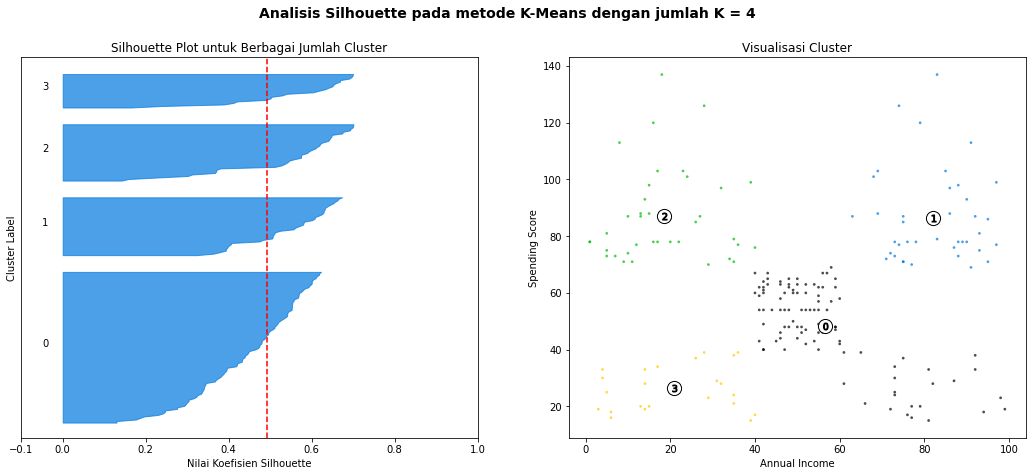

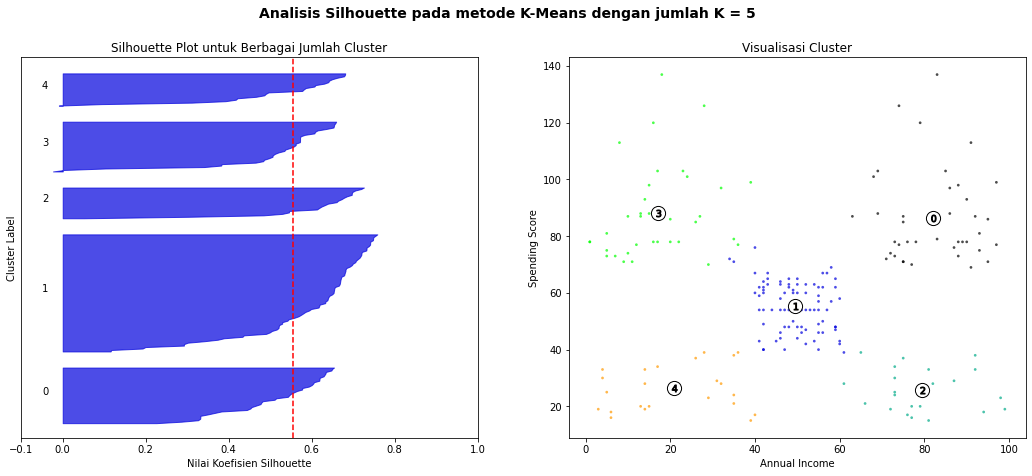

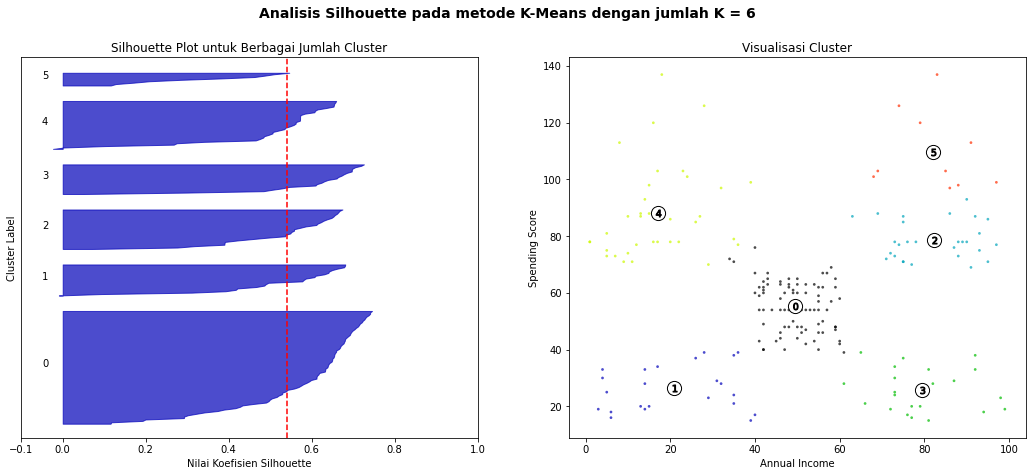

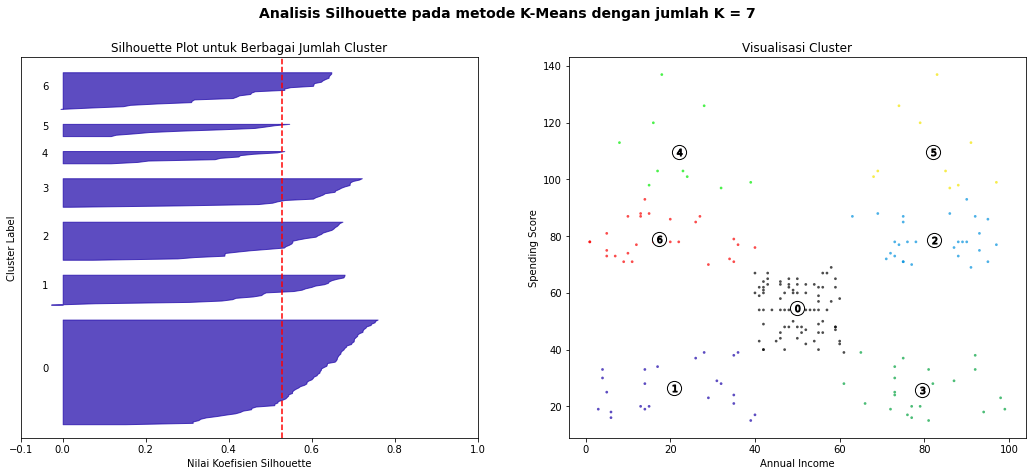

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

jumlah_clusters = [2, 3, 4, 5, 6, 7]
for cluster in jumlah_clusters:
    # Buat subplot untuk visualisasi dengan format 1 baris dan 2 kolom
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Subplot pertama adalah silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (cluster + 1) * 10])
    
    # Inisialisasi objek KMeans
    kmeans = KMeans(n_clusters=cluster, 
                    init='k-means++',
                    random_state=111) 
    cluster_labels = kmeans.fit_predict(X)
    
    # Hitung rata-rata nilai silhouette untuk semua sampel
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('Untuk jumlah clusters = {}, Avg. Silhouette Score = {}'.format(cluster, np.round(silhouette_avg, 2)))
        
    # Hitung nilai silhouette untuk setiap cluster
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(cluster):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(1) / cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Berikan label pada silhouette plot
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax1.set_title('Silhouette Plot untuk Berbagai Jumlah Cluster')
    ax1.set_xlabel('Nilai Koefisien Silhouette')
    ax1.set_ylabel('Cluster Label')
    
    # Berikan garis vertical yang menunjukkan nilai rata-rata nilai silhouette
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Plot kedua untuk visualisasi cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / cluster)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    # Berikan label pada plot
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title('Visualisasi Cluster')
    ax2.set_xlabel('Annual Income')
    ax2.set_ylabel('Spending Score')
    
    plt.suptitle(('Analisis Silhouette pada metode K-Means dengan jumlah K = %d' % cluster), 
                 fontsize=14, fontweight='bold')